#### IMPORTANT! 
`c_solver.ME_solver` always needs to be imported first, else throws segfaults when operating!! 

In [2]:
from qdot_wrappers import *
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# test 1: swap gate with 2 bits

In [66]:
B1 = 2e9
B2 = 2.100e9 

J = 10e6
start = 50e-9
t_gate = 1/J

In [67]:
sim = two_qubit_sim(B1, B2)

sim.RF_exchange(J, abs(B1-B2), start, start + t_gate/2, 0)

sim.pulsed_exchange(3*J/2, start, start + t_gate/2)

sim.RF_exchange(J, abs(B1-B2), start + t_gate/2, start + t_gate, 0*np.pi)

sim.pulsed_exchange(3*J/2, start + t_gate/2, start + t_gate)

# sim.pulsed_exchange(J/2, start + t_gate/2, start + t_gate)

# sim.mw_pulse(B1, np.pi/2, 2.5e6, start + t_gate + 0e-9, start + t_gate + 100e-9)


DM = np.zeros([4,4], dtype=np.complex)
DM[2,2] = 1

sim.calc_time_evolution(DM, 0, 200e-9, 40000)

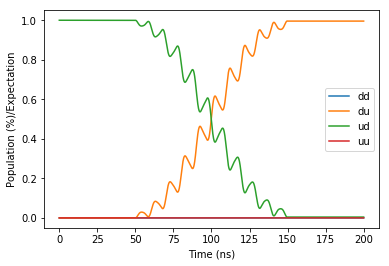

In [68]:
sim.plot_pop()
plt.show()

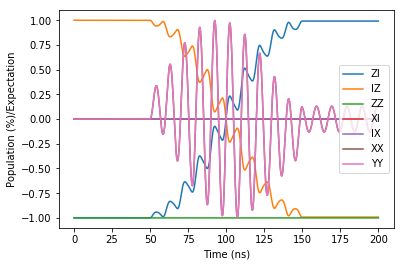

In [69]:
sim.plot_expect()
plt.show()

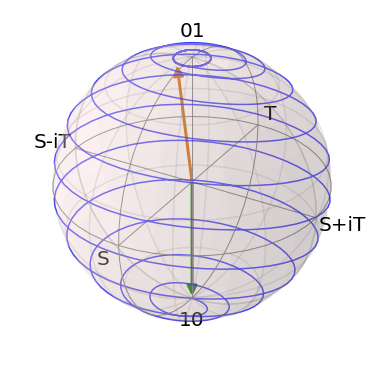

In [70]:
sim.plot_ST_bloch_sphere(1000)
plt.show()

In [71]:
U = sim.get_unitary()

U_wanted = np.array([
    [1,0,0,0],
    [0,0,1,0],
    [0,1,0,0],
    [0,0,0,1]
    ])

print(f'fidelity: {sim.get_fidelity(U_wanted):.2%} \n')

np.set_printoptions(precision=2)

print('target : \n', U_wanted, '\n')
print(f'U : \n', U, '\n' )
print(f'U * exp(3j/4*np.pi) : \n', 
      U*np.exp(3j/4*np.pi), '\n')

fidelity: 99.83% 

target : 
 [[1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]] 

U : 
 [[-0.71-0.71j  0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j   -0.02-0.06j -0.71-0.7j   0.  +0.j  ]
 [ 0.  +0.j   -0.7 -0.71j  0.06+0.02j  0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j   -0.71-0.71j]] 

U * exp(3j/4*np.pi) : 
 [[ 1.  +1.11e-12j -0.  +0.00e+00j -0.  +0.00e+00j -0.  +0.00e+00j]
 [-0.  +0.00e+00j  0.06+2.59e-02j  1.  -1.54e-03j -0.  +0.00e+00j]
 [-0.  +0.00e+00j  1.  +1.54e-03j -0.06+2.59e-02j -0.  +0.00e+00j]
 [-0.  +0.00e+00j -0.  +0.00e+00j -0.  +0.00e+00j  1.  -1.07e-12j]] 



# test 2: testing crosstalk with two bits

In [38]:
# decreasing t_gate increases offresonant component (crosstalk)
t_gate = 10e-9 # good results with 100ns, at 10ns crosstalk is strong

B1 = 2e9
B2 = 2.100e9 
mw_f = B1
rabi_f = 1 / (2 * t_gate) # amplitude tuned to half a rabi oscillation

pulse_start = t_gate * 0.1
tot_time = t_gate + 2*pulse_start

sim = two_qubit_sim(B1, B2)

sim.mw_pulse(mw_f, 0, rabi_f, pulse_start, pulse_start + t_gate)

DM = np.zeros([4,4], dtype=np.complex)
DM[0,0] = 1

sim.calc_time_evolution(DM, 0, tot_time, 40000)

sim.plot_pop()
plt.show()

sim.plot_qubit_bloch_sphere(10000)
plt.show()

sim.plot_qubit_bloch_sphere(10000, 1)
plt.show()

B1 = 2e9
B2 = 2.100e9 
mw_f = B1
rabi_f = 1 / (2 * t_gate) # amplitude tuned to half a rabi oscillation

pulse_start = t_gate * 0.1
tot_time = t_gate + 2*pulse_start

sim = two_qubit_sim(B1, B2)

sim.mw_pulse(mw_f, 0, rabi_f, pulse_start, pulse_start + t_gate)

DM = np.zeros([4,4], dtype=np.complex)
DM[0,0] = 1

sim.calc_time_evolution(DM, 0, tot_time, 40000)

sim.plot_pop()
plt.show()

sim.plot_qubit_bloch_sphere(10000)
plt.show()

sim.plot_qubit_bloch_sphere(10000, 1)
plt.show()

In [39]:
B1 = 2e9
B2 = 2.100e9 
mw_f = B1
rabi_f = 1 / (2 * t_gate) # amplitude tuned to half a rabi oscillation

pulse_start = t_gate * 0.1
tot_time = t_gate + 2*pulse_start

In [40]:
sim = two_qubit_sim(B1, B2)

sim.mw_pulse(mw_f, 0, rabi_f, pulse_start, pulse_start + t_gate)

DM = np.zeros([4,4], dtype=np.complex)
DM[0,0] = 1

sim.calc_time_evolution(DM, 0, tot_time, 40000)

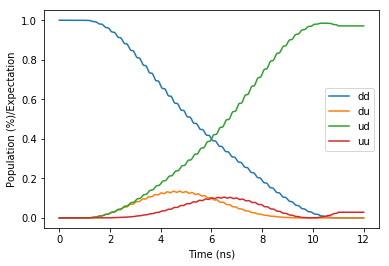

In [41]:
sim.plot_pop()
plt.show()

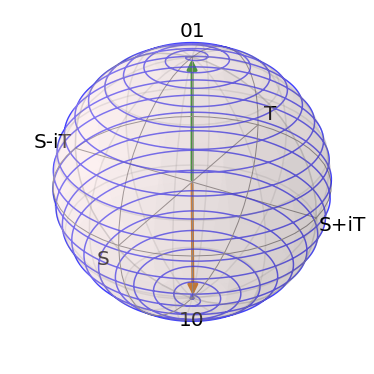

In [42]:
sim.plot_qubit_bloch_sphere(10000)
plt.show()

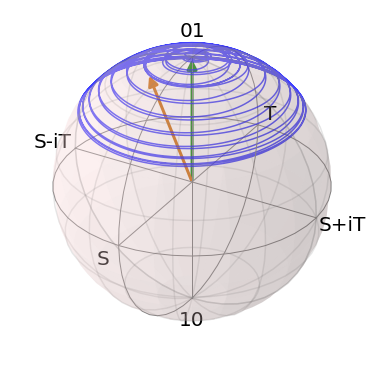

In [43]:
sim.plot_qubit_bloch_sphere(10000, 1)
plt.show()

# test 3: exchange interaction (no RF) with two bits

In [51]:
B1 = 2e9
B2 = 2.100e9 

J = 10e6
start = 50e-9
t_gate = 1/J

In [52]:
sim = two_qubit_sim(B1, B2)

sim.pulsed_exchange(3*J/2, start, start + t_gate/2)

sim.pulsed_exchange(3*J/2, start + t_gate/2, start + t_gate)

DM = np.zeros([4,4], dtype=np.complex)
DM[2,2] = 1

sim.calc_time_evolution(DM, 0, 200e-9, 40000)

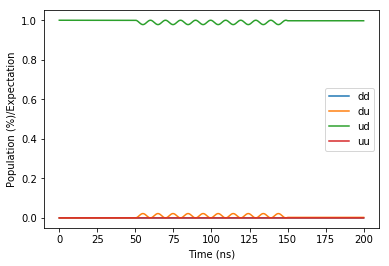

In [53]:
sim.plot_pop()
plt.show()

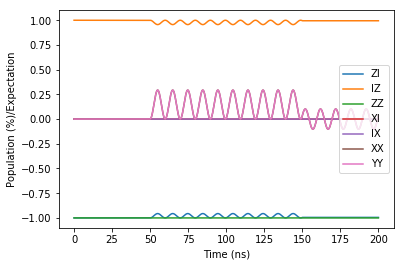

In [54]:
sim.plot_expect()
plt.show()

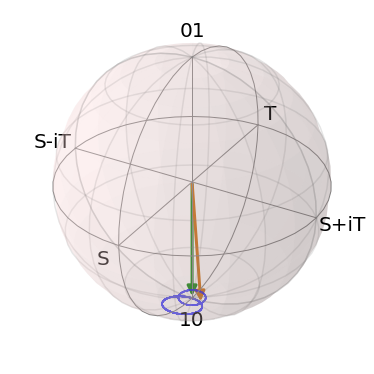

In [55]:
sim.plot_ST_bloch_sphere(1000)
plt.show()

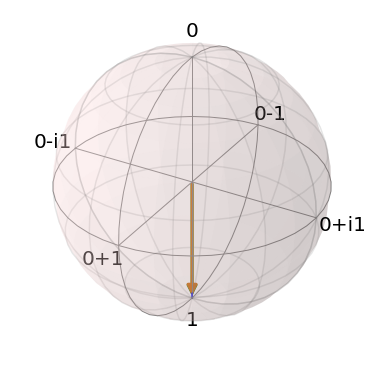

In [56]:
sim.plot_qubit_bloch_sphere(10000, 0)
plt.show()

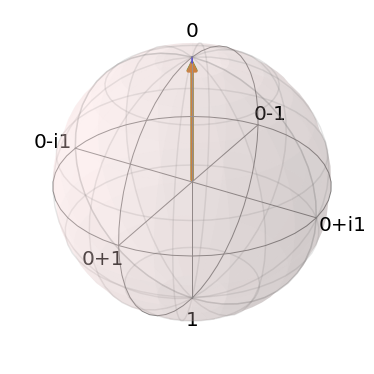

In [57]:
sim.plot_qubit_bloch_sphere(10000, 1)
plt.show()